# Project 3 Heart Failure Prediction

Anggota:
1. Muhammad Taufiqul Hakim
2. M. Dwi Pratama
3. Rossanda Sevia Gadis
4. Shafira Almaisa

# Latar Belakang

>Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor 1 secara global, penyakit ini diperkirakan telah merenggut 17,9 juta setiap tahun serta menyumbang 31% dari seluruh kematian di seluruh dunia.
>Gagal jantung merupakan peristiwa umum yang disebabkan oleh CVD dan pada dataset terdapat 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.
>Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor resiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, aktivitas fisik dan penggunaan alkohol yang berbahaya.
>Orang dengan penyakit kardiovaskular atau yang beresiko tinggi memerlukan deteksi dini di mana model machine learning dapat sangat membantu.



# Data

>Data yang digunakan pada kasus ini adalah data **Heart Failure Prediction** yang diambil dari Kaggle. Data memiliki feature sebagai berikut:

>1. `age` - umur pasien
>2. `anaemia` - pengurangan hemoglobin
> - 0: tidak
> - 1: ya
>3. `creatinine_phosphokinase` - level enzim CPK (mcg/L)
>4. `diabetes` - riwayat diabetes
> - 0: tidak
> - 1: ya
>5. `ejection_fraction` - persentase darah yang meninggalkan jantung setiap kontraksi jantung (persen)
>6. `high_blood_pressure` - riwayat hipertensi
> - 0: tidak
> - 1: ya
>7. `platelets` - jumlah platelet di darah dalam kiloplatelets/mL
>8. `serum_creatinine` - level serum creatinine di darah (mg/dL)
>9. `serum_sodium` - level serum sodium di darah dalam (mEq/L)
>10. `sex` - gender/jenis kelamin
> - 0: perempuan
> - 1: laki-laki
>11. `smoking` - pasien merokok
> - 0: tidak
> - 1: ya
>12. `time` - waktu dalam hari untuk follow-up
>13. `DEATH_EVENT` - pasien sudah meninggal saat waktu follow-up
> - 0: tidak
> - 1: ya

# Capaian

>Capaian dari project ini adalah peserta dapat memahami konsep Classification dengan Ensemble Model, mempersiapkan data untuk digunakan dalam Ensemble Model, mengimplementasikan Ensemble Model untuk membuat prediksi.


# Import Pustaka

Dilakukan proses import pustaka dimana akan diakses beberapa fungsi di dalamnya yang akan digunakan untuk keperluan membangun model klasifikasi ini.

In [1]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# building model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Data Loading

Proses impor data dari situs Kaggle dapat dilakukan menggunakan fungsi seperti berikut.

In [2]:
#! pip install -q kaggle
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

In [3]:
#! kaggle datasets download -d andrewmvd/heart-failure-clinical-data

In [4]:
#!unzip heart-failure-clinical-data.zip

Proses mengimpor dataset dilakukan menggunakan fungsi `pd.read_csv`. Untuk menampilkan data teratas digunakan fungsi `.head()`

In [5]:
#read data

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Dilakukan proses rename kolom untuk mempermudah proses analisis.
- kolom `anaemia` di-rename dengan nama `anemia`
- kolom `DEATH_EVENT` di-rename dengan nama `death`

Digunakan argumen `inplace=True` untuk menjadikan perubahan pada nama kolom secara permanen.

In [6]:
# rename columns

df.rename(columns= {"anaemia":"anemia","DEATH_EVENT":"death"}, inplace = True)

Dimensi atau bentuk data dapat diketahui menggunakan fungsi `.shape()`

In [7]:
# dataset shape

df.shape

(299, 13)

Berdasarkan output, dapat diketahui bahwa terdapat 299 baris dan 13 kolom pada dataset.

Informasi yang terdapat pada dataset seperti nama kolom, informasi jumlah data non-null pada masing-masing kolom dan tipe data pada masing-masing kolom dapat diketahui menggunakan fungsi `.info()`

In [8]:
# information from dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Cleaning

Pengecekan terhadap nilai null dapat dilakukan menggunakan fungsi `.isna().sum()`

In [9]:
# null-value check

df.isna().sum()

age                         0
anemia                      0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death                       0
dtype: int64

Pengecekan terhadap nilai yang memiliki duplikat dapat dilakukan menggunakan fungsi `.duplicated().sum()`

In [10]:
# duplicated data check

df.duplicated().sum()

0

Korelasi antar kolom pada data dapat diketahui menggunakan fungsi `.corr()`

In [11]:
# correlation check

df.corr()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


>Berdasarkan nilai korelasi antar kolom dapat dipilih beberapa kolom yang dapat digunakan untuk membangun model. 

>Kolom-kolom yang digunakan untuk membangun model diantaranya:

>1. Kolom `time` memiliki korelasi yang tinggi dengan kolom target yaitu `death` sebesar -0.53. Hal ini berarti semakin sering dilakukan follow-up kondisi pasien maka resiko kematian akibat penyakit jantung semakin kecil.
>2. Kolom `ejection_fraction` memiliki koefisien korelasi negatif sebesar -0.27. Hal ini berarti semakin rendah presentase darah yang keluar dari jantung maka semakin tinggi resiko kematian akibat penyakit jantung.
>3. Kolom `serum_sodium` memiliki koefisien korelasi negatif sebesar -0.2. Hal ini berarti semakin rendah level serum sodium maka resiko kematian akibat penyakit jantung juga semakin tinggi.
>4. Kolom `serum_creatinine` memiliki korelasi positif sebesar 0.29. Hal ini berarti semakin tinggi evel serum creatinne dalam tubuh pasien, maka resiko kematian akibat penyakit jantung juga semakin tinggi.
>5. Kolom `age` memiliki korelasi positif sebesar 0.25. Hal ini berarti semakin tua usia pasien, maka reskio kematian akibat penyakit jantung semakin tinggi.
>6. Kolom `anemia`, `diabetes`, `high_blood_pressure`, `sex`, `smoking` merupakan kolom dengan korelasi yang rendah. Namun, pada beberapa penelitian anemia, diabetes, hipertensi, gender, dan perilaku merokok berpengaruh terhadap resiko kematian akibat penyakit jantung.

Dilakukan drop pada kolom `creatinine_phosphokinase` dan `platelets` menggunakan fungsi `.drop()`.

- axis=1 : menghapus seluruh nilai pada kolom
- inplace=True : menghapus secara permanen

In [12]:
# drop columns

df.drop(['creatinine_phosphokinase','platelets'],axis=1,inplace=True)

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom-kolom yang di-assign memuat data yang tidak sesuai tipenya, setelah itu value error tersebut akan digantikan dengan NaN.

In [13]:
# value error check 'age'
for row in df['age']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['age'] = np.nan

# value error check 'anemia'
for row in df['anemia']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['anemia'] = np.nan

# value error check 'diabetes'
for row in df['diabetes']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['diabetes'] = np.nan

# value error check 'high_blood_pressure'
for row in df['high_blood_pressure']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['high_blood_pressure'] = np.nan

# value error check 'sex'
for row in df['sex']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['sex'] = np.nan

# value error check 'smoking'
for row in df['smoking']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['smoking'] = np.nan

# value error check 'ejection_fraction'
for row in df['ejection_fraction']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['ejection_fraction'] = np.nan

# value error check 'serum_creatinine'
for row in df['serum_creatinine']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['serum_creatinine'] = np.nan

# value error check 'serum_sodium'
for row in df['serum_sodium']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['serum_sodium'] = np.nan

# value error check 'time' 
for row in df['time']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['time'] = np.nan

# value error check 'death'
for row in df['death']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['death'] = np.nan

Dilakukan pengecekan kembali terhadap data null.

In [14]:
# null-value check

df.isna().sum()

age                    0
anemia                 0
diabetes               0
ejection_fraction      0
high_blood_pressure    0
serum_creatinine       0
serum_sodium           0
sex                    0
smoking                0
time                   0
death                  0
dtype: int64

Tidak ditemukan data null pada kolom.

# Eksplorasi Data (EDA)

>Exploratory Data Analysis (EDA) adalah proses eksplorasi data yang bertujuan untuk memahami struktur, pola, hubungan, dan anomali dalam data. EDA merupakan langkah awal yang penting dalam analisis data dan pembuatan modelm yang membantu kita untuk memahami data dan mengidentifikasi masalah yang mungkin muncul dalam proses analisis.

In [15]:
df.describe()

,age,anemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,0.418060,38.083612,0.351171,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,0.494067,11.834841,0.478136,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,0.000000,14.000000,0.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,0.000000,30.000000,0.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,0.000000,38.000000,0.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,1.000000,45.000000,1.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1.000000,80.000000,1.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Describe() berfungsi untuk memperoleh ringkasan informasi mengenai ukuran pemusatan data (central tendency) dan ukuran penyebaran data (measure of spread) dari masing-masing kolom yang berisi nilai numerik pada set data. Pada kasus ini, semua kolom pada data tersebut memiliki nilai numerik.

In [16]:
df['death'].value_counts()

0    203
1     96
Name: death, dtype: int64

Kolom 'death' merupakan target dari analisis ini, sehingga dilakukan pengecekan terhadap nilai-nilai yang ada didalamnya, dengan menggunakan value_counts() didapatkan hasil pada target 'Not Survived'(:0) berjumlah 203, dan target 'Survived'(:1) berjumlah 96 pada data tersebut.

>Visualisasi frekuensi nilai pada kolom `Death Event` dapat ditampilkan menggunakan fungsi `.plot()` dengan menggunakan pie plot dengan argumen yang disesuaikan.

>* `kind=''`: mendefinsikan jenis plot yang digunakan yaitu pie
>* `figsize=()`: mendefinisikan ukuran plot
>* `autopct=''`: menambahkan teks presentase
>* `shadow=True`: menambahkan bayangan pada plot
>* `colors=['']`: memberikan warna tertentu pada chart
>* `explode=['']`: memberikan jarak pada masing-masing slice pada chart
>* `labeldistance=`: memberikan jarak antara label dan gambar, label disini yaitu 'Not Survived' dan 'Survived'
>* `startangle=`: berfungsi untuk mengatur rotasi dari plot tersebut.
>* `shadow=`: berfungsi untuk memberikan bayangan/shadow pada plot.


>Untuk menambahkan keterangan pada plot, dapat digunakan fungsi sebagai berikut:

>* `plt.title()`: memberi judul pada plot.
>* `plt.legend()`: berfungsi untuk membuat legenda label pada plot.
>* `loc=`: mengatur letak dari legenda yang dibuat.

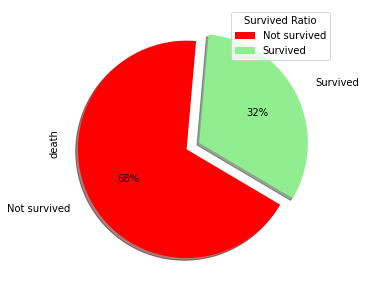

In [17]:
label = ['Not survived', 'Survived']
stats = df['death'].value_counts()
colors = ['red', 'lightgreen']
stats.plot(kind='pie',labels=label,figsize=(7,5), autopct='%1.0f%%', labeldistance=1.2, startangle=85,explode=[0.13,0], colors=colors, shadow = True)
plt.legend(title = "Survived Ratio", loc='upper right')
plt.show()

Berdasarkan pie plot diatas diketahui bahwa rasio nilai dari target **Not Survived** sebesar 68% dari total nilai target pada kolom 'death', yang mana nilai tersebut lebih besar dibandingkan target **Survived** yang memiliki nilai 32% dari total nilai target.

Dari data target tersebut diketahui bahwa terjadi ketidakseimbangan antar data **Not Survived** dan **Survived** dan akan mempengaruhi akurasi dari model prediksi sehingga di proses selanjutnya akan dilakukan proses balancing dengan metode seperti random sampling atau SMOTE untuk membuat data target tersebut menjadi seimbang.

In [18]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))
    
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=20)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

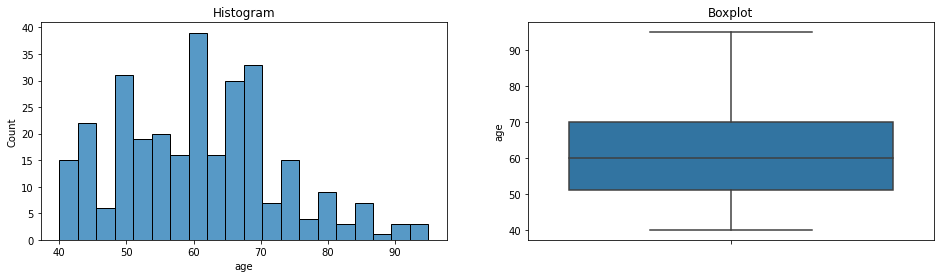

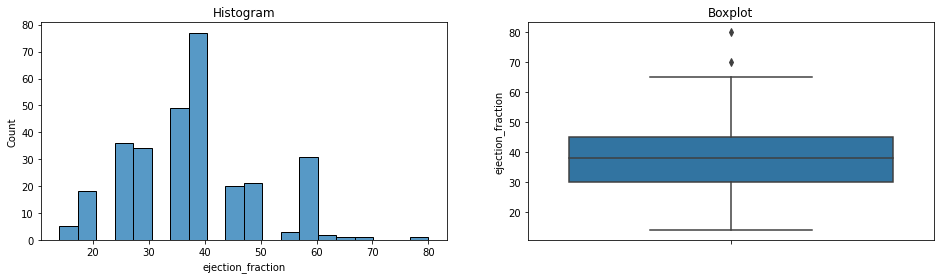

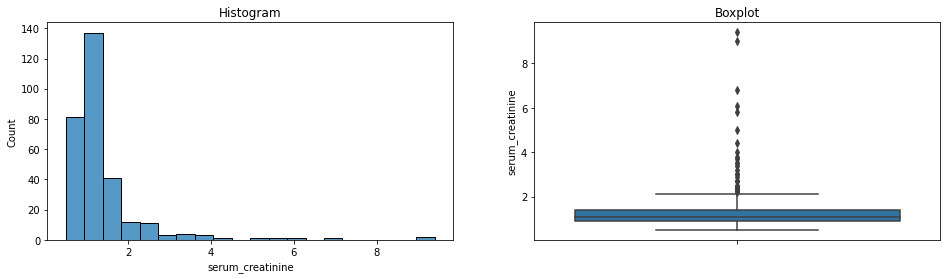

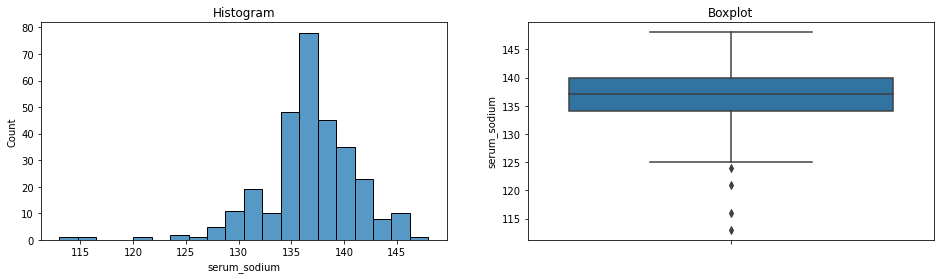

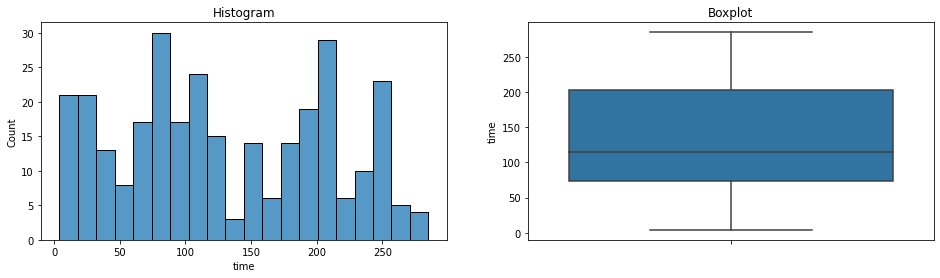

In [19]:
diagnostic_plots(df, 'age')
diagnostic_plots(df, 'ejection_fraction')
diagnostic_plots(df, 'serum_creatinine')
diagnostic_plots(df, 'serum_sodium')
diagnostic_plots(df, 'time')

>Berdasarkan diagnostic plots diatas, dapat diketahui beberapa informasi sebagai berikut:

>*   Plot histogram pada kolom **Age** cenderung normal atau simetris. Hal ini dapat diketahui melalui garis median pada boxplot yang berada di tengah kotak tetapi panjang whisker bawah lebih pendek dibanding whisker atas. Selain itu, bentuk histogram menyerupai bentuk kurva lonceng. Namun, terdapat sedikit skew positif pada plot tersebut yang mana sedikit lebih condong ke kiri. Data pada kolom tersebut tidak memiliki outliers.
>*   Plot histogram pada kolom **EjectionFraction** cenderung simetris. Hal ini dapat diketahui melalui garis median pada boxplot yang berada di tengah kotak dan panjang whisker bawah sama dengan panjang whisker bawah. Selain itu, bentuk histogram menyerupai bentuk kurva lonceng. Namun, terdapat sedikit skew positif pada plot tersebut yang mana sedikit lebih condong ke kiri. Data pada kolom tersebut memiliki outliers.
>*   Plot histogram pada kolom **SerumCreatinine** cendrung tidak normal. Hal ini dapat diketahui melalui garis median yang berada tidak di tengah kotak dan whisker atas lebih panjang daripada whisker bawah. Selain itu, bentuk histogram tidak menyerupai bentuk kurva lonceng. Terdapat skew positif pada plot tersebut yang mana lebih condong ke kiri, dan terdapat banyak outliers pada data.
>*   Plot histogram pada kolom **SerumSodium** cendrung tidak normal dan plot condong ke kanan (positif skewed). Hal ini dapat diketahui melalui bentuk plot yang lebih condong ke kanan. Namun, pada data terdapat banyak outliers di atas nilai minimum sehingga sebaran data cenderung miring ke kanan. Selain itu, bentuk histogram tidak menyerupai bentuk kurva lonceng.
>*   Plot histogram pada kolom **Time** cenderung tidak normal. Hal ini dapat diketahui melalui garis median yang tidak berada di tengah kotak dan panjang whisker bawah lebih pendek daripada whisker atas. Selain itu, bentuk histogram tidak menyerupai bentuk kurva lonceng.

In [20]:
print('Skewness of Age\t\t\t\t:', df.age.skew())
print('Skewness of Ejection Fraction\t\t:', df.ejection_fraction.skew())
print('Skewness of Serum Creatinine\t\t:', df.serum_creatinine.skew())
print('Skewness of Serum Sodium\t\t:', df.serum_sodium.skew())
print('Skewness of time\t\t\t:', df.time.skew())

Skewness of Age				: 0.42306190672863536
Skewness of Ejection Fraction		: 0.5553827516973211
Skewness of Serum Creatinine		: 4.455995882049026
Skewness of Serum Sodium		: -1.0481360160574988
Skewness of time			: 0.12780264559841184


>Untuk mengetahui tingkat kemiringan dari data setelah melihat probability plot dan box plot tersebut, dapat menggunakan fungsi .skew(). Nilai dari koefisien skewness dapat digunakan untuk mengetahui tingkat kemiringan atau sebaran data.
>- Nilai koefisien skewness > nol (0) : positive skewed (mean > median > modus)
>- Nilai koefisien skewness = nol (0) : simetrical data (mean = median = modus)
>- NIlai koefisien skewness < nol (0) : negative skewed (mean < median < modus)

>Dari hasil analisis skewed diatas diperoleh :
>- Kolom **Age** dan **EjectionFraction** cendrung normal/simetris karena nilai skewnessnya mendekati 0.
>- Kolom **SerumCreatinine** dan **Time** cendrung positif skewed karena nilai skewnessnya lebih besar dari nol.
>- Kolom **SerumSodium** cendrung negative skewed karena nilai skewnessnya lebih kecil dari nol.

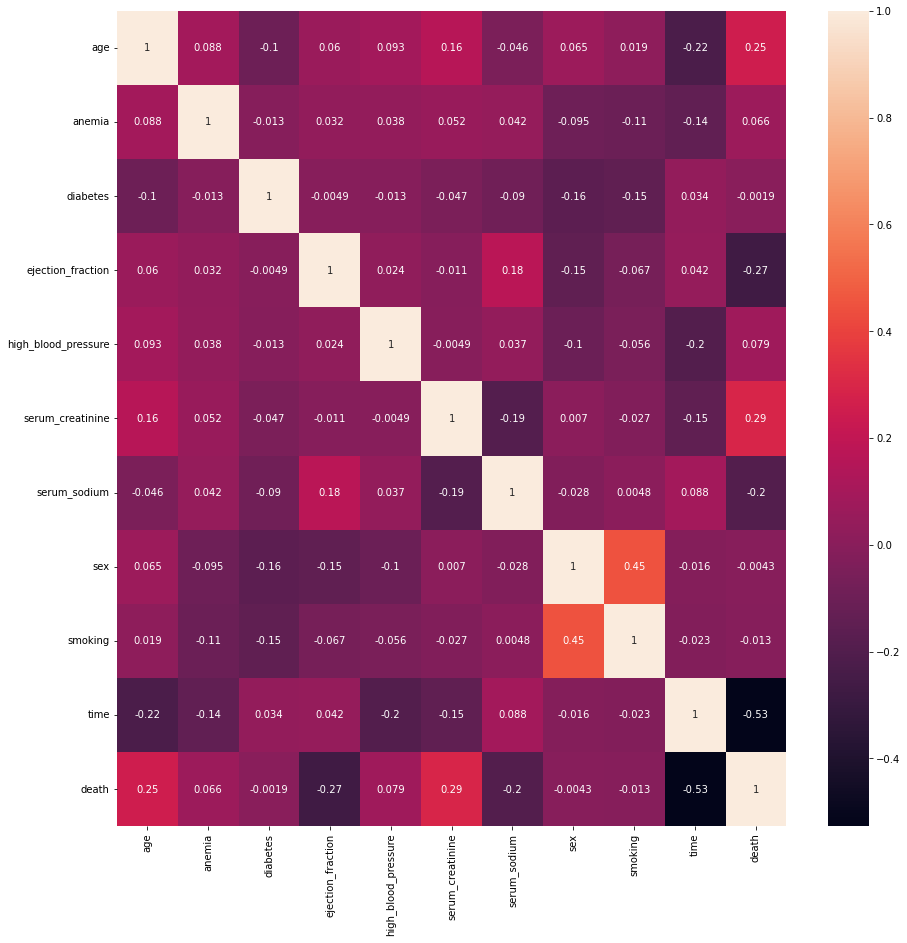

In [21]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(),annot=True)
plt.show()

Berdasarkan hasil dari Correlation heatmap Plot dengan menggunakan seaborn diketahui bahwa korelasi paling tinggi terhadap kolom target **death** yaitu kolom **time**, **serumcreatinine**, dan **age**. 

# Pre-Processing Data

## Splitting Data

>Splitting data yaitu membagi data menjadi dua bagian atau lebih yang membentuk subhimpunan data. Umumnya, data splitting memisahkan dua bagian, bagian pertama digunakan untuk mengevaluasi atau uji data dan data lainnya digunakan untuk melatih model. Dalam analisis ini data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi model.

>- X : data feature
>- y : data label (target)

In [22]:
X = df.drop(columns='death',axis=1)
y = df['death']

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Setelah data feature (X) dan data target (y) didefinisikan, dilakukan standarisasi pada data tersebut dengan menggunakan fungsi `StandarScaler()`

In [24]:
ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)
print(y.value_counts())
print(y_ros.value_counts())

0    203
1     96
Name: death, dtype: int64
1    203
0    203
Name: death, dtype: int64


Untuk mengatasi adanya imbalanced data, data perlu di-resampling menggunakan metode balancing. Dalam analisis ini dilakukan beberapa uji metode balancing yaitu dengan uji tanpa balancing, random over sampling, dan SMOTE. Dan setelah dilakukan uji dipilih metode **random over sampling (ROS)** merupakan suatu metode re-sampling yang terbaik untuk analisis data tersebut yang berfungsi untuk menyeimbangkan set data dengan cara  menambah sampel kelas minoritas dengan cara pengambilan sampel yang dilakukan secara acak. Hal ini dimaksudkan agar representasi sampel yang dipilih tidak bias dari total populasi. Dan juga dipilih metode tersebut dikarenakan data yang digunakan untuk analisis tergolong data yang kecil(sedikit). Sehingga didapat hasil target untuk 'Not Survived'(:0) dan 'Survived'(:1) telah menjadi seimbang yaitu 203:203.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=0)

In [26]:
print('Training dataset\t:', len(X_train))
print('Testing dataset\t\t:', len(X_test))
print('Training\t\t: {0:0.02f}% ada pada dataset'.format((len(X_train)/len(X_ros)) * 100))
print('Test\t\t\t: {0:0.02f}% ada pada dataset'.format((len(X_test)/len(X_ros)) * 100))

Training dataset	: 284
Testing dataset		: 122
Training		: 69.95% ada pada dataset
Test			: 30.05% ada pada dataset


Dari hasil balancing didapat data yang digunakan pada training dataset sebanyak 284 data dan data yang digunakan pada testing dataset sebanyak 122 data dari total sebanyak 406 data. Hasil spliting diatas juga sudah memenuhi syarat splitting yaitu perbandingan untuk data training dan testing sebesar 80:20 atau 70:30 dari dataset.

# Pendefinisian model

Ensemble merupakan metode klasifikasi yang menggabungkan model dari beberapa algoritma untuk melakukan prediksi label dari suatu data.

In [27]:
model_lr = LogisticRegression(solver ='liblinear',multi_class ='ovr',max_iter = 100)
model_svm = SVC(kernel='linear', C=0.1, probability=True)
model_dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

Pada project ini, dipilih tiga algoritma untuk membangun model ensemble. Algoritma yang dipilih adalah Logistic Regression, Support Vector Machine(SVM) dan Decision Tree. Menggunakan code di atas, dibangun ketiga model tersebut dengan pilihan parameter terbaik berdasarkan percobaan tuning parameter yang telah dilakukan.

In [28]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR', model_lr)) 
estimator.append(('SVC', model_svm)) 
estimator.append(('DTC', model_dtc))

Dibuat sebuah list, yang diberi nama estimator. List tersebut diisi dengan model-model yang telah dibangun sebelumnya.

## Voting Classifier

Voting Classifier merupakan salah satu metode ensemble dimana prediksi dilakukan berdasarkan voting estimator-estimator yang telah dipilih.

### Hard Voting

In [29]:
# Pendefinisian Model
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 

Hard Voting merupakan metode Voting Classifier dimana label prediksi untuk suatu data dipilih berdasarkan suara terbanyak(output class terbanyak) dari hasil prediksi seluruh model. Menggunakan fungsi `VotingClassifier()`, dibangun model untuk melakukan hard voting dengan memberikan input 'hard' pada parameter voting.

### Soft Voting

In [30]:
# Pendefinisian Model
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 

Soft Voting merupakan metode Voting Classifier dimana label prediksi untuk suatu data dipilih berdasarkan rata-rata probabilitas ketiga model yang digunakan dimana perhitungan rata-rata dilakukan pada masing-masing label/class. Class dengan rata-rata probabilitas tertinggi akan dipilih sebagai label prediksi untuk data tersebut. Menggunakan fungsi `VotingClassifier()`, dibangun model untuk melakukan hard voting dengan memberikan input 'soft' pada parameter voting.

## Stacking

In [31]:
model_stacking = StackingClassifier(estimators=estimator)

Stacking merupakan metode klasifikasi ensemble dimana sebuah model terdiri dari beberapa layer. Suatu layer dapat diisi oleh model dengan berbagai macam algoritma, layer terakhir akan memuat satu model algoritma sebagai final estimator. Kali ini, hanya dibangun model stacking dengan dua layer, layer base dan layer final estimator dimana layer base berisikan model Logistic Regression, SVM dan Decision Tree. Sedangkan untuk Final Estimator, tidak diberikan input sehingga akan dibangun mengikuti default dari parameter tersebut yaitu Logistic Regression.

## Random Forest

In [32]:
model_rfc = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth = 2)

Random Forest merupakan salah satu metode ensemble dimana akan dibangun sebuah model prediksi dengan cara menggabungkan beberapa Decision Tree.

# Pelatihan Model

## Voting Classifier

### Hard Voting

In [33]:
# Fitting model
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('SVC',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('DTC',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3))])

Dilakukan fitting model Hard Voting untuk ketiga estimator yang telah dipilih menggunakan data training.

In [34]:
# Predict data
y_pred_train_hard = hard_voting.predict(X_train)
y_pred_test_hard = hard_voting.predict(X_test)

Kemudian dilakukan prediksi data menggunakan data testing dan data training pada model Hard Voting.

In [35]:
# Tabel perbandingan actual label dan predicted label untuk data training
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_hard
train

,death,Predict_Train
191,0,0
297,0,0
233,0,0
49,1,1
349,1,1
...,...,...
323,1,1
192,0,0
117,0,1
47,1,1


In [36]:
# Tabel perbandingan actual label dan predicted label untuk data testing
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_hard
test

,death,Predict_Test
175,0,0
239,0,0
60,1,1
231,0,0
134,0,1
...,...,...
96,0,1
145,0,0
89,0,1
364,1,1


Ditampilkan tabel yang memuat label asli dan label prediksi dari suatu data yang dapat digunakan untuk melihat garis besar perbandingan hasil output yang diprediksi oleh model Hard Voting. Di atas ditampilkan label untuk data training kemudian ditampilkan untuk data testing.

### Soft Voting

In [37]:
# Fitting Model
soft_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('SVC',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('DTC',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3))],
                 voting='soft')

Dilakukan fitting model Soft Voting untuk ketiga estimator yang telah dipilih menggunakan data training.

In [38]:
# Predict data
y_pred_train_soft = soft_voting.predict(X_train)
y_pred_test_soft = soft_voting.predict(X_test)

Kemudian dilakukan prediksi data menggunakan data testing dan data training pada model Soft Voting.

In [39]:
# Tabel perbandingan actual label dan predicted label untuk data training
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_soft
train

,death,Predict_Train
191,0,0
297,0,0
233,0,0
49,1,1
349,1,1
...,...,...
323,1,1
192,0,0
117,0,1
47,1,1


In [40]:
# Tabel perbandingan actual label dan predicted label untuk data testing
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_soft
test

,death,Predict_Test
175,0,0
239,0,0
60,1,1
231,0,0
134,0,1
...,...,...
96,0,1
145,0,0
89,0,1
364,1,1


Ditampilkan tabel yang memuat label asli dan label prediksi dari suatu data yang dapat digunakan untuk melihat garis besar perbandingan hasil output yang diprediksi oleh model Soft Voting. Di atas ditampilkan label untuk data training kemudian ditampilkan untuk data testing.

## Stacking

In [41]:
# VFitting Model
model_stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('LR',
                                LogisticRegression(multi_class='ovr',
                                                   solver='liblinear')),
                               ('SVC',
                                SVC(C=0.1, kernel='linear', probability=True)),
                               ('DTC',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=3))])

Dilakukan fitting model Stacking untuk ketiga estimator yang telah dipilih menggunakan data training. Feature Output dari ketiga model layer base akan digunakan untuk training final estimator(Logistic Regression).

In [42]:
# Predict data
y_pred_train_stacking = model_stacking.predict(X_train)
y_pred_test_stacking = model_stacking.predict(X_test)

Kemudian dilakukan prediksi data menggunakan data testing dan data training pada model Stacking.

In [43]:
# Tabel perbandingan actual label dan predicted label untuk data training
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_stacking
train

,death,Predict_Train
191,0,0
297,0,0
233,0,0
49,1,1
349,1,1
...,...,...
323,1,1
192,0,0
117,0,1
47,1,1


In [44]:
# Tabel perbandingan actual label dan predicted label untuk data testing
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_stacking
test

,death,Predict_Test
175,0,0
239,0,0
60,1,1
231,0,0
134,0,1
...,...,...
96,0,1
145,0,0
89,0,1
364,1,1


Ditampilkan tabel yang memuat label asli dan label prediksi dari suatu data yang dapat digunakan untuk melihat garis besar perbandingan hasil output yang diprediksi oleh model Stacking. Di atas ditampilkan label untuk data training kemudian ditampilkan untuk data testing.

## Random Forest

In [45]:
# Fitting Model Random Forest
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

Dilakukan fitting atau proses learning model berdasarkan data training (features dan label) yang telah disiapkan sebelumnya.

In [46]:
# Predict labels
y_pred_train_rfc = model_rfc.predict(X_train)
y_pred_test_rfc = model_rfc.predict(X_test)

Kemudian dilakukan prediksi menggunakan model Random Forest untuk masing-masing data (Training Data dan Testing Data).

In [47]:
# Tabel perbandingan actual label dan predicted label untuk data training
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_rfc
train

,death,Predict_Train
191,0,0
297,0,0
233,0,0
49,1,1
349,1,1
...,...,...
323,1,0
192,0,0
117,0,1
47,1,1


In [48]:
# Tabel perbandingan actual label dan predicted label untuk data testing
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_rfc
test

,death,Predict_Test
175,0,0
239,0,0
60,1,1
231,0,0
134,0,0
...,...,...
96,0,0
145,0,0
89,0,0
364,1,1


Ditampilkan tabel yang memuat label asli dan label prediksi dari suatu data yang dapat digunakan untuk melihat garis besar perbandingan hasil output yang diprediksi oleh model Random Forest. Di atas ditampilkan label untuk data training kemudian ditampilkan untuk data testing.

# Evaluasi Model

## Voting Classifier

### Hard Voting

In [49]:
print('Accuracy score data train model Hard Voting adalah :',accuracy_score(y_train, y_pred_train_hard))
print('Accuracy score data test model Hard Voting adalah :',accuracy_score(y_test, y_pred_test_hard))


Accuracy score data train model Hard Voting adalah : 0.8485915492957746
Accuracy score data test model Hard Voting adalah : 0.819672131147541


>- Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Hard Voting sebesar 0.819 atau sebesar 82% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score, data training lebih besar dari 0.029 atau 3% data testing yang dapat disimpulkan terjadi overfitting tetapi dengan nilai sangat kecil.




Hasil Classification Report Hard Voting
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        53
           1       0.85      0.83      0.84        69

    accuracy                           0.82       122
   macro avg       0.82      0.82      0.82       122
weighted avg       0.82      0.82      0.82       122



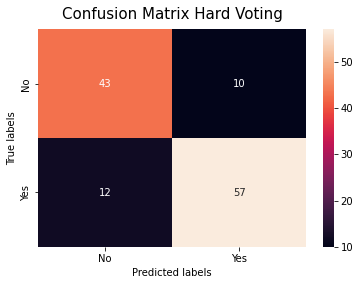

In [50]:
print('\nHasil Classification Report Hard Voting')
print(classification_report(y_test,y_pred_test_hard)) 

cm_hard = confusion_matrix(y_test,y_pred_test_hard)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Hard Voting', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

>- Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.81 (:0) dan 0.83 (:1) cukup mendekati nilai precision yaitu 0.78 (:0) dan 0.85 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

>- Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 43, false negatif (FN) sebanyak 12, false positif (FP) sebanyak  10, dan true positif (TP) sebanyak 57.

### Soft Voting

In [51]:
print('Accuracy score data train model Soft Voting adalah :',accuracy_score(y_train, y_pred_train_soft))
print('Accuracy score data test model Soft Voting adalah :',accuracy_score(y_test, y_pred_test_soft))


Accuracy score data train model Soft Voting adalah : 0.8697183098591549
Accuracy score data test model Soft Voting adalah : 0.8278688524590164


>- Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Soft Voting sebesar 0.827 atau sebesar 83% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score, data training lebih besar 0.042 atau 4% dari data testing yang dapat disimpulkan terjadi overfitting pada model Soft Voting dengan nilai sangat kecil.




Hasil Classification Report Soft Voting
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        53
           1       0.85      0.84      0.85        69

    accuracy                           0.83       122
   macro avg       0.82      0.83      0.83       122
weighted avg       0.83      0.83      0.83       122



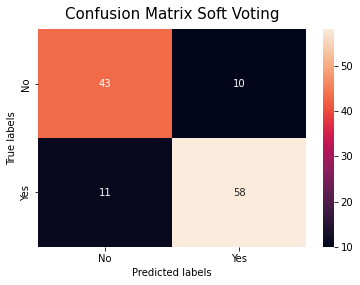

In [52]:
print('\nHasil Classification Report Soft Voting')
print(classification_report(y_test,y_pred_test_soft)) 

cm_soft = confusion_matrix(y_test,y_pred_test_soft)
ax= plt.subplot()
sns.heatmap(cm_soft, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Soft Voting', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

>- Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.81 (:0) dan 0.84 (:1) cukup mendekati nilai precision yaitu 0.80 (:0) dan 0.85 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

>- Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 43, false negatif (FN) sebanyak 11, false positif (FP) sebanyak  10, dan true positif (TP) sebanyak 58.

## Stacking

In [53]:
print('Accuracy score data train model Stacking adalah :',accuracy_score(y_train, y_pred_train_stacking))
print('Accuracy score data test model Stacking adalah :',accuracy_score(y_test, y_pred_test_stacking))


Accuracy score data train model Stacking adalah : 0.8732394366197183
Accuracy score data test model Stacking adalah : 0.8114754098360656


>- Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Stacking sebesar 0.811 atau sebesar 81% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score, data training lebih besar 0.072 atau 7% dari data testing yang dapat disimpulkan terjadi overfitting pada model Stacking namun dengan nilai cukup kecil.




Hasil Classification Report Stacking
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        53
           1       0.85      0.81      0.83        69

    accuracy                           0.81       122
   macro avg       0.81      0.81      0.81       122
weighted avg       0.81      0.81      0.81       122



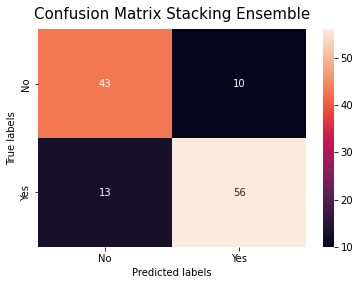

In [54]:
print('\nHasil Classification Report Stacking')
print(classification_report(y_test,y_pred_test_stacking)) 

cm_stacking = confusion_matrix(y_test,y_pred_test_stacking)
ax= plt.subplot()
sns.heatmap(cm_stacking, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Stacking Ensemble', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

>- Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.81 (:0) dan 0.81 (:1) cukup mendekati nilai precision yaitu 0.77 (:0) dan 0.85 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

>- Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 43, false negatif (FN) sebanyak 13, false positif (FP) sebanyak  10, dan true positif (TP) sebanyak 56.

## Random Forest


In [55]:
print('Accuracy score data train model Random Forest adalah :',accuracy_score(y_train, y_pred_train_rfc))
print('Accuracy score data test model Random Forest adalah :',accuracy_score(y_test, y_pred_test_rfc))


Accuracy score data train model Random Forest adalah : 0.8626760563380281
Accuracy score data test model Random Forest adalah : 0.8442622950819673


>- Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Random Forest sebesar 0.836 atau sebesar 84% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score, data training lebih besar 0.019 atau 2% dari data testing yang dapat disimpulkan terjadi overfitting namun dengan nilai yang sangat kecil.




Hasil Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        53
           1       0.90      0.81      0.85        69

    accuracy                           0.84       122
   macro avg       0.84      0.85      0.84       122
weighted avg       0.85      0.84      0.84       122



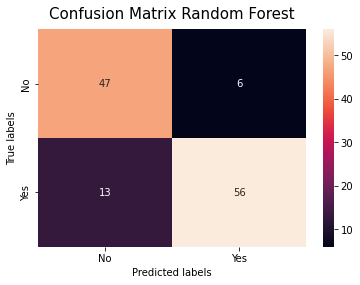

In [56]:
print('\nHasil Classification Report Random Forest')
print(classification_report(y_test,y_pred_test_rfc)) 

cm_rfc = confusion_matrix(y_test,y_pred_test_rfc)
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forest', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

>- Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.87 (:0) dan 0.81 (:1) cukup mendekati nilai precision yaitu 0.78 (:0) dan 0.89 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

>- Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 46, false negatif (FN) sebanyak 13, false positif (FP) sebanyak  7, dan true positif (TP) sebanyak 56.

# Kesimpulan

>**Dari Hasil Analisis diatas dapat ditarik kesimpulan sebagai berikut:**

>- Dari hasil analisis feature selection age,	anemia,	diabetes,	ejection_fraction,	high_blood_pressure,	serum_creatinine,	serum_sodium,	sex,	smoking,	time,	death, kita gunakan dalam membangun model dan didapatkan bahwa berdasarkan data tersebut kita dapat memperkirakan resiko kematioan orang yang menderita gagal jantung dengan akurasi prediksi dari beberapa model sebesar 81-84%.
>- Dari analisis pie plot diatas diketahui bahwa rasio nilai dari target Not Survived sebesar 68% dari total nilai target pada kolom 'death', yang mana nilai tersebut lebih besar dibandingkan target Survived yang memiliki nilai 32% dari total nilai target. Untuk mengatasi adanya imbalanced data, data perlu di-resampling menggunakan metode balancing. Dalam analisis ini dilakukan beberapa uji metode balancing yaitu dengan uji tanpa balancing, random over sampling, dan SMOTE. Dan setelah dilakukan uji dipilih metode random over sampling (ROS) Sehingga didapat hasil target untuk 'Not Survived'(:0) dan 'Survived'(:1) telah menjadi seimbang yaitu 203:203.
>- Dari diagnostic plot diketahui bahwa variabel Age dan EjectionFraction cenderung normal/simetris, sedangkan untuk SerumCreatinine dan Time cenderung positif skewed, dan SerumSodium cenderung negative skewed
>- Dari grafik boxplot diketahui bahwa terdapat outliers pada variabel EjectionFraction, SerumCreatinine, dan SerumSodium. Sedangkan pada variabel Age dan Time tidak terdapat outliers.
>- Berdasarkan hasil dari Correlation heatmap Plot terdapat korelasi paling tinggi terhadap kolom target death yaitu kolom time, serumcreatinine, dan age.
>- Dalam metode Voting model yang digunakan adalah Logistic Regression, Support Vector Machine, dan Decission Tree.
>- Dalam metode Stacking model yang digunakan juga Logistic Regression, Support Vector Machine dan Decission Tree dengan final estimator Logistic Regression
>- Dari pemodelan-pemodelan tersebut, didapatkan akurasi **Hard Voting 82%**, **Soft Voting 83%**, **Stacking 81%**, dan **Random Forest 84%**. Dengan Random Forest sebagai model terbaik dengan tingkat akurasi tertinggi, dengan nilai selisih akurasi dari train dan test **2%** sehingga bisa dikatakatan tidak terjadi underfitting atau overfitting dengan nilai yang sangat kecil dan dapat dihiraukan.
>- Sehingga dapat disimpulkan untuk memprediksi kematian akibat gagal jantung setidaknya membutuhkan beberapa variabel yaitu **time, ejection_fraction, serum_sodium, serum_creatinine, age, anemia, diabetes, high_blood_pressure, sex, dan smoking**.